### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import pandas as pd

# File to Load (Remember to Change These)
school_data_to_load = "Resources/schools_complete.csv"
student_data_to_load = "Resources/students_complete.csv"

# Read School and Student Data File and store into Pandas Data Frames
school_data = pd.read_csv(school_data_to_load)
student_data = pd.read_csv(student_data_to_load)

# Combine the data into a single dataset
school_data_complete = pd.merge(student_data, school_data, how="left", on=["school_name", "school_name"])

In [2]:
# Reviewing Data Types
school_data_complete.dtypes

# we don't like floats anyway

Student ID        int64
student_name     object
gender           object
grade            object
school_name      object
reading_score     int64
math_score        int64
School ID         int64
type             object
size              int64
budget            int64
dtype: object

In [3]:
# Reviewing Numeric Data
school_data_complete.describe()

# appears to be clean data, no missing values from merge. grades make sense 0-99
# guessing size and budget pertain to the school's information after the merge

,Student ID,reading_score,math_score,School ID,size,budget
count,39170.000000,39170.00000,39170.000000,39170.000000,39170.000000,3.917000e+04
mean,19584.500000,81.87784,78.985371,6.978172,3332.957110,2.117241e+06
std,11307.549359,10.23958,12.309968,4.444329,1323.914069,8.749987e+05
min,0.000000,63.00000,55.000000,0.000000,427.000000,2.480870e+05
25%,9792.250000,73.00000,69.000000,3.000000,1858.000000,1.081356e+06
50%,19584.500000,82.00000,79.000000,7.000000,2949.000000,1.910635e+06
75%,29376.750000,91.00000,89.000000,11.000000,4635.000000,3.022020e+06
max,39169.000000,99.00000,99.000000,14.000000,4976.000000,3.124928e+06


In [4]:
# Reviewing DF head
school_data_complete.head()

# data visually seems to match dtype as expected
# student names have prefixes it appears. Odd that there is a Dr. in Highschool and that his grades are lackluster..

,Student ID,student_name,gender,grade,school_name,reading_score,math_score,School ID,type,size,budget
0,0,Paul Bradley,M,9th,Huang High School,66,79,0,District,2917,1910635
1,1,Victor Smith,M,12th,Huang High School,94,61,0,District,2917,1910635
2,2,Kevin Rodriguez,M,12th,Huang High School,90,60,0,District,2917,1910635
3,3,Dr. Richard Scott,M,12th,Huang High School,67,58,0,District,2917,1910635
4,4,Bonnie Ray,F,9th,Huang High School,97,84,0,District,2917,1910635


In [5]:
# reviewing individual tables incase I decide to use them
school_data.head()

,School ID,school_name,type,size,budget
0,0,Huang High School,District,2917,1910635
1,1,Figueroa High School,District,2949,1884411
2,2,Shelton High School,Charter,1761,1056600
3,3,Hernandez High School,District,4635,3022020
4,4,Griffin High School,Charter,1468,917500


In [6]:
# reviewing individual tables incase I decide to use them
student_data.head()

,Student ID,student_name,gender,grade,school_name,reading_score,math_score
0,0,Paul Bradley,M,9th,Huang High School,66,79
1,1,Victor Smith,M,12th,Huang High School,94,61
2,2,Kevin Rodriguez,M,12th,Huang High School,90,60
3,3,Dr. Richard Scott,M,12th,Huang High School,67,58
4,4,Bonnie Ray,F,9th,Huang High School,97,84


## District Summary

* Calculate the total number of schools

* Calculate the total number of students

* Calculate the total budget

* Calculate the average math score 

* Calculate the average reading score

* Calculate the overall passing rate (overall average score), i.e. (avg. math score + avg. reading score)/2

* Calculate the percentage of students with a passing math score (70 or greater)

* Calculate the percentage of students with a passing reading score (70 or greater)

* Create a dataframe to hold the above results

* Optional: give the displayed data cleaner formatting

In [7]:
# using data from the school_data_complete only since we are using relative data to the student data and was used as merge left
total_schools = school_data_complete['school_name'].nunique()

# the nunique value is different from the .count value; 
# normally I would pivot and concat to remove certain duplicates, but leaving as is to match solutions
total_students = school_data_complete['student_name'].count()

# did not format to USD as we are not told that is the currency
total_budget = round(school_data_complete['budget'].unique().sum(), 2)

math_score_avg = school_data_complete['math_score'].mean()

read_score_avg = school_data_complete['reading_score'].mean()

math_pass_pct = (len(school_data_complete['math_score'].loc[school_data_complete['math_score'] >= 70]) / total_students) * 100

read_pass_pct = (len(school_data_complete['reading_score'].loc[school_data_complete['reading_score'] >= 70]) / total_students) * 100

# I think Overall Passing Rate is a misleading title. perfer Overall Avg Score. Would prefer calc on Total Passing Rate.
total_score_avg = (math_score_avg + read_score_avg) / 2

# did not include % signs in titles since characters can lead to issues in some languages (i.e. escape characters)
ds_df = pd.DataFrame(data = {
    'Total Schools' : [total_schools],
    'Total Students' : [total_students],
    'Total Budget' : [total_budget],
    'Average Math Score' : [math_score_avg],
    'Average Reading Score' : [read_score_avg],
    'Percent Passing Math' : [math_pass_pct],
    'Percent Passing Reading' : [read_pass_pct],
    'Overall Average Score' : [total_score_avg]
})


ds_df

,Total Schools,Total Students,Total Budget,Average Math Score,Average Reading Score,Percent Passing Math,Percent Passing Reading,Overall Average Score
0,15,39170,24649428,78.985371,81.87784,74.980853,85.805463,80.431606


In [11]:
# Provided Solution

,Total Schools,Total Students,Total Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing Rate
0,15,"39,170","$24,649,428.00",78.985371,81.87784,74.980853,85.805463,80.431606


## School Summary

* Create an overview table that summarizes key metrics about each school, including:
  * School Name
  * School Type
  * Total Students
  * Total School Budget
  * Per Student Budget
  * Average Math Score
  * Average Reading Score
  * % Passing Math
  * % Passing Reading
  * Overall Passing Rate (Average of the above two)
  
* Create a dataframe to hold the above results

## Top Performing Schools (By Passing Rate)

* Sort and display the top five schools in overall passing rate

In [ ]:
# must have pandas v 0.25 + for this section for pd.NamedAdd method

In [8]:
# making DF with passing students grouped per school per subject
sch_math_pass_df = school_data_complete[['school_name', 'math_score']][school_data_complete['math_score'] >=70].groupby('school_name').count().rename(columns={'math_score':'math_pass'})
sch_read_pass_df = school_data_complete[['school_name', 'reading_score']][school_data_complete['reading_score'] >=70].groupby('school_name').count().rename(columns={'reading_score':'read_pass'})
sch_pass_df = sch_math_pass_df.merge(sch_read_pass_df ,on='school_name', how='inner')

# making working DF by merging the passing students with source data DF
ss_df = school_data_complete.merge(sch_pass_df, on='school_name', how='left')

#performing general groupby aggregates and naming aggregate columns
ss_df = ss_df.groupby('school_name').agg(
    School_Type = ('type', 'max'),
    Total_Students = ('Student ID', 'count'),
    Total_School_Budget = ('budget', 'max'),
    Average_Math_Score = ('math_score', 'mean'),
    Average_Reading_Score = ('reading_score', 'mean'),
    Percent_Passing_Math = ('math_pass', 'max'),
    Percent_Passing_Reading = ('read_pass', 'max'),
)

# generating post-group statistics
ss_df['Per_Student_Budget'] = ss_df['Total_School_Budget'] / ss_df['Total_Students']
ss_df['Percent_Passing_Math'] = (ss_df['Percent_Passing_Math'] / ss_df['Total_Students']) * 100
ss_df['Percent_Passing_Reading'] = (ss_df['Percent_Passing_Reading'] / ss_df['Total_Students']) * 100
ss_df['Total_Passing_Rate'] = (ss_df['Percent_Passing_Math'] + ss_df['Percent_Passing_Reading']) /2

# displaying Top Performing Schools
ss_df.sort_values(by='Total_Passing_Rate', ascending=False).head(5)

,School_Type,Total_Students,Total_School_Budget,Average_Math_Score,Average_Reading_Score,Percent_Passing_Math,Percent_Passing_Reading,Per_Student_Budget,Total_Passing_Rate
school_name,,,,,,,,,
Cabrera High School,Charter,1858,1081356,83.061895,83.975780,94.133477,97.039828,582.0,95.586652
Thomas High School,Charter,1635,1043130,83.418349,83.848930,93.272171,97.308869,638.0,95.290520
Pena High School,Charter,962,585858,83.839917,84.044699,94.594595,95.945946,609.0,95.270270
Griffin High School,Charter,1468,917500,83.351499,83.816757,93.392371,97.138965,625.0,95.265668
Wilson High School,Charter,2283,1319574,83.274201,83.989488,93.867718,96.539641,578.0,95.203679


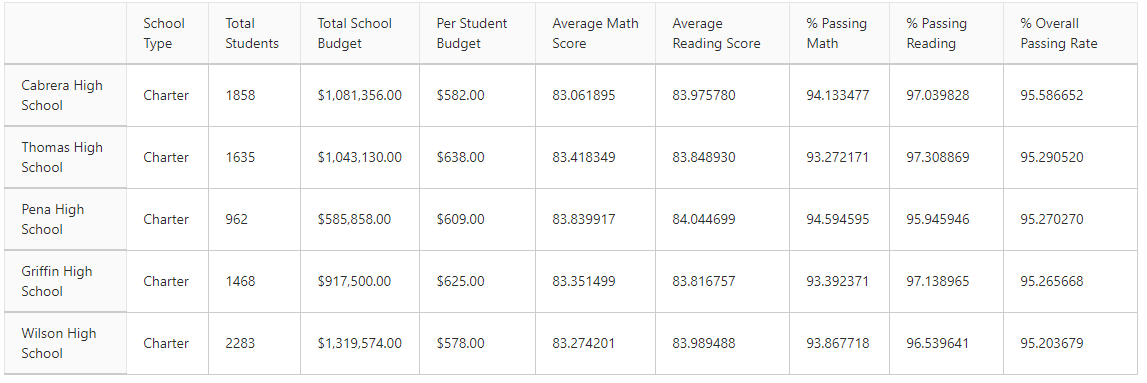

## Bottom Performing Schools (By Passing Rate)

* Sort and display the five worst-performing schools

In [9]:
ss_df.sort_values(by='Total_Passing_Rate', ascending=True).head(5)

,School_Type,Total_Students,Total_School_Budget,Average_Math_Score,Average_Reading_Score,Percent_Passing_Math,Percent_Passing_Reading,Per_Student_Budget,Total_Passing_Rate
school_name,,,,,,,,,
Rodriguez High School,District,3999,2547363,76.842711,80.744686,66.366592,80.220055,637.0,73.293323
Figueroa High School,District,2949,1884411,76.711767,81.158020,65.988471,80.739234,639.0,73.363852
Huang High School,District,2917,1910635,76.629414,81.182722,65.683922,81.316421,655.0,73.500171
Johnson High School,District,4761,3094650,77.072464,80.966394,66.057551,81.222432,650.0,73.639992
Ford High School,District,2739,1763916,77.102592,80.746258,68.309602,79.299014,644.0,73.804308


In [14]:
# Provided Solution

,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing Rate
Rodriguez High School,District,3999,"$2,547,363.00",$637.00,76.842711,80.744686,66.366592,80.220055,73.293323
Figueroa High School,District,2949,"$1,884,411.00",$639.00,76.711767,81.158020,65.988471,80.739234,73.363852
Huang High School,District,2917,"$1,910,635.00",$655.00,76.629414,81.182722,65.683922,81.316421,73.500171
Johnson High School,District,4761,"$3,094,650.00",$650.00,77.072464,80.966394,66.057551,81.222432,73.639992
Ford High School,District,2739,"$1,763,916.00",$644.00,77.102592,80.746258,68.309602,79.299014,73.804308


## Math Scores by Grade

* Create a table that lists the average Reading Score for students of each grade level (9th, 10th, 11th, 12th) at each school.

  * Create a pandas series for each grade. Hint: use a conditional statement.
  
  * Group each series by school
  
  * Combine the series into a dataframe
  
  * Optional: give the displayed data cleaner formatting

In [10]:
# grouped source data by school_name and grade, took the mean of the math score
sch_math_bygrade_df = pd.DataFrame(school_data_complete.groupby(['school_name', 'grade'], as_index=False)['math_score'].mean())

# pivoted grade to match formatting
sch_math_bygrade_df = sch_math_bygrade_df.pivot(index='school_name', columns='grade')['math_score']

#displaying in similar order for formatting
sch_math_bygrade_df[['9th', '10th', '11th', '12th']]

grade,9th,10th,11th,12th
school_name,,,,
Bailey High School,77.083676,76.996772,77.515588,76.492218
Cabrera High School,83.094697,83.154506,82.765560,83.277487
Figueroa High School,76.403037,76.539974,76.884344,77.151369
Ford High School,77.361345,77.672316,76.918058,76.179963
Griffin High School,82.044010,84.229064,83.842105,83.356164
Hernandez High School,77.438495,77.337408,77.136029,77.186567
Holden High School,83.787402,83.429825,85.000000,82.855422
Huang High School,77.027251,75.908735,76.446602,77.225641
Johnson High School,77.187857,76.691117,77.491653,76.863248


In [15]:
# Provided Solution

,9th,10th,11th,12th
Bailey High School,77.083676,76.996772,77.515588,76.492218
Cabrera High School,83.094697,83.154506,82.765560,83.277487
Figueroa High School,76.403037,76.539974,76.884344,77.151369
Ford High School,77.361345,77.672316,76.918058,76.179963
Griffin High School,82.044010,84.229064,83.842105,83.356164
Hernandez High School,77.438495,77.337408,77.136029,77.186567
Holden High School,83.787402,83.429825,85.000000,82.855422
Huang High School,77.027251,75.908735,76.446602,77.225641
Johnson High School,77.187857,76.691117,77.491653,76.863248
Pena High School,83.625455,83.372000,84.328125,84.121547


## Reading Score by Grade 

* Perform the same operations as above for reading scores

In [11]:
sch_math_bygrade_df = pd.DataFrame(school_data_complete.groupby(['school_name', 'grade'], as_index=False)['reading_score'].mean())
sch_math_bygrade_df = sch_math_bygrade_df.pivot(index='school_name', columns='grade')['reading_score']

sch_math_bygrade_df[['9th', '10th', '11th', '12th']]

grade,9th,10th,11th,12th
school_name,,,,
Bailey High School,81.303155,80.907183,80.945643,80.912451
Cabrera High School,83.676136,84.253219,83.788382,84.287958
Figueroa High School,81.198598,81.408912,80.640339,81.384863
Ford High School,80.632653,81.262712,80.403642,80.662338
Griffin High School,83.369193,83.706897,84.288089,84.013699
Hernandez High School,80.866860,80.660147,81.396140,80.857143
Holden High School,83.677165,83.324561,83.815534,84.698795
Huang High School,81.290284,81.512386,81.417476,80.305983
Johnson High School,81.260714,80.773431,80.616027,81.227564


In [16]:
# Provided Solution

,9th,10th,11th,12th
Bailey High School,81.303155,80.907183,80.945643,80.912451
Cabrera High School,83.676136,84.253219,83.788382,84.287958
Figueroa High School,81.198598,81.408912,80.640339,81.384863
Ford High School,80.632653,81.262712,80.403642,80.662338
Griffin High School,83.369193,83.706897,84.288089,84.013699
Hernandez High School,80.866860,80.660147,81.396140,80.857143
Holden High School,83.677165,83.324561,83.815534,84.698795
Huang High School,81.290284,81.512386,81.417476,80.305983
Johnson High School,81.260714,80.773431,80.616027,81.227564
Pena High School,83.807273,83.612000,84.335938,84.591160


## Scores by School Spending

* Create a table that breaks down school performances based on average Spending Ranges (Per Student). Use 4 reasonable bins to group school spending. Include in the table each of the following:
  * Average Math Score
  * Average Reading Score
  * % Passing Math
  * % Passing Reading
  * Overall Passing Rate (Average of the above two)

In [12]:
# Sample bins. Feel free to create your own bins.
spending_bins = [0, 585, 615, 645, 675]
group_names = ["<$585", "$585-615", "$615-645", "$645-675"]

In [13]:
# imported ss_df and reset index
sch_spend_df = ss_df.reset_index()

# cut column onto new DF for bins
sch_spend_df['Spending_per_Student'] = pd.cut(sch_spend_df['Per_Student_Budget'], spending_bins, labels=group_names)

# groupedby bins and performed mean aggregates
sch_spend_df = sch_spend_df.groupby('Spending_per_Student').agg({
    'Average_Math_Score' : 'mean',
    'Average_Reading_Score' : 'mean', 
    'Percent_Passing_Math' : 'mean',
    'Percent_Passing_Reading' : 'mean',
    'Total_Passing_Rate' : 'mean'
})


sch_spend_df.head()

,Average_Math_Score,Average_Reading_Score,Percent_Passing_Math,Percent_Passing_Reading,Total_Passing_Rate
Spending_per_Student,,,,,
<$585,83.455399,83.933814,93.460096,96.610877,95.035486
$585-615,83.599686,83.885211,94.230858,95.900287,95.065572
$615-645,79.079225,81.891436,75.668212,86.106569,80.887391
$645-675,76.997210,81.027843,66.164813,81.133951,73.649382


In [18]:
# Provided Solution

,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing Rate
Spending Ranges (Per Student),,,,,
<$585,83.455399,83.933814,93.460096,96.610877,95.035486
$585-615,83.599686,83.885211,94.230858,95.900287,95.065572
$615-645,79.079225,81.891436,75.668212,86.106569,80.887391
$645-675,76.997210,81.027843,66.164813,81.133951,73.649382


## Scores by School Size

* Perform the same operations as above, based on school size.

In [14]:
# Sample bins. Feel free to create your own bins.
size_bins = [0, 1000, 2000, 5000]
group_names2 = ["Small (<1000)", "Medium (1000-2000)", "Large (2000-5000)"]

In [15]:
# imported ss_df and reset index
sch_size_df = ss_df.reset_index()

# cut column onto new DF for bins
sch_size_df['School_Size'] = pd.cut(sch_size_df['Total_Students'], size_bins, labels=group_names2)

# groupedby bins and performed mean aggregates
sch_size_df = sch_size_df.groupby('School_Size').agg({
    'Average_Math_Score' : 'mean',
    'Average_Reading_Score' : 'mean', 
    'Percent_Passing_Math' : 'mean',
    'Percent_Passing_Reading' : 'mean',
    'Total_Passing_Rate' : 'mean'
})


sch_size_df.head()

,Average_Math_Score,Average_Reading_Score,Percent_Passing_Math,Percent_Passing_Reading,Total_Passing_Rate
School_Size,,,,,
Small (<1000),83.821598,83.929843,93.550225,96.099437,94.824831
Medium (1000-2000),83.374684,83.864438,93.599695,96.790680,95.195187
Large (2000-5000),77.746417,81.344493,69.963361,82.766634,76.364998


In [19]:
# Provided Solution

,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing Rate
School Size,,,,,
Small (<1000),83.821598,83.929843,93.550225,96.099437,94.824831
Medium (1000-2000),83.374684,83.864438,93.599695,96.790680,95.195187
Large (2000-5000),77.746417,81.344493,69.963361,82.766634,76.364998


## Scores by School Type

* Perform the same operations as above, based on school type.

In [16]:
# imported ss_df and reset index
sch_type_df = ss_df.reset_index()

# groupedby bins and performed mean aggregates
sch_type_df = sch_type_df.groupby('School_Type').agg({
    'Average_Math_Score' : 'mean',
    'Average_Reading_Score' : 'mean', 
    'Percent_Passing_Math' : 'mean',
    'Percent_Passing_Reading' : 'mean',
    'Total_Passing_Rate' : 'mean'
})


sch_type_df.head()

,Average_Math_Score,Average_Reading_Score,Percent_Passing_Math,Percent_Passing_Reading,Total_Passing_Rate
School_Type,,,,,
Charter,83.473852,83.896421,93.620830,96.586489,95.103660
District,76.956733,80.966636,66.548453,80.799062,73.673757


In [20]:
# Provided Solution

,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing Rate
School Type,,,,,
Charter,83.473852,83.896421,93.620830,96.586489,95.103660
District,76.956733,80.966636,66.548453,80.799062,73.673757
